# <font color = 'pickle'>**Import/Install the packages**

In [1]:
if 'google.colab' in str(get_ipython()):
    print('Running on Colab')
else:
    print('Not Running on Colab')

Not Running on Colab


In [2]:
if 'google.colab' in str(get_ipython()):
  !pip install --upgrade feature_engine scikit-learn -q

In [3]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

In [4]:
import feature_engine

In [5]:
print(feature_engine.__version__)

1.5.0


In [6]:
import sklearn

In [7]:
print(sklearn.__version__)

1.1.2


In [8]:
"""Importing the required packages"""

# For DataFrames and manipulations
import pandas as pd
import numpy as np

# For data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

from scipy.stats import uniform, truncnorm, randint, loguniform

# drop arbitrary features
from feature_engine.selection import DropFeatures

# For categorical variables
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import DecisionTreeEncoder

# Missing value imputation
from feature_engine.imputation import MeanMedianImputer

# add missing indicator 
from feature_engine.imputation import AddMissingIndicator

# categorical imputer
from feature_engine.imputation import CategoricalImputer

# random sample imputer
from feature_engine.imputation import RandomSampleImputer

# Numerical variable Transformation
from feature_engine.transformation import LogTransformer

# Handling Outliers
from feature_engine.outliers import Winsorizer

# feature engine wrapper 
from feature_engine.wrappers import SklearnTransformerWrapper

# sklearn pre-processor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

# DIscretization
from sklearn.preprocessing import KBinsDiscretizer

# For splitting the dataset
from sklearn.model_selection import train_test_split

# Using Support Vector Machines as models
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# creating pipelines 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

# draws a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# save and load models
import joblib

# Pathlib to navigate file system
from pathlib import Path
import sys

# <font color = 'pickle'> **Specify Project Folder Location**

In [9]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive') 

In [10]:
if 'google.colab' in str(get_ipython()):
    base_folder = Path('/content/drive/MyDrive/data/')
else:
    base_folder = Path('/home/harpreet/Insync/google_drive_shaannoor/data/')

In [11]:
data_folder = base_folder/'datasets'
save_model_folder = base_folder/'models/ml_fall_2022'
custom_function_folder = base_folder/'custom-functions'
save_model_folder.mkdir(exist_ok=True, parents=True)

In [12]:
%load_ext autoreload
%autoreload 2

In [13]:
sys.path.append(str(custom_function_folder))

In [14]:
sys.path

['/home/harpreet/Insync/google_drive_teaching/teaching_fall_2022/ml-fall-2022/Lecture8_SVM_DTree',
 '/home/harpreet/mambaforge/lib/python310.zip',
 '/home/harpreet/mambaforge/lib/python3.10',
 '/home/harpreet/mambaforge/lib/python3.10/lib-dynload',
 '',
 '/home/harpreet/.local/lib/python3.10/site-packages',
 '/home/harpreet/mambaforge/lib/python3.10/site-packages',
 '/home/harpreet/mambaforge/lib/python3.10/site-packages/sentencepiece-0.1.95-py3.10-linux-x86_64.egg',
 '/home/harpreet/Insync/google_drive_shaannoor/data/custom-functions']

In [15]:
from  plot_learning_curve import plot_learning_curve

In [16]:
from eda_plots import diagnostic_plots, plot_target_by_category

# <font color = 'pickle'>**Import the dataset**
Next, we will create variables to store paths where the data exists and where we will save the model. 

Now, we will create a variable to store the specific data file path from the data source folder.

In [17]:
file = data_folder / 'modified_churn.csv'

Now, we will create a data-frame using the above file path and Pandas....  

In [18]:
df = pd.read_csv(file)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074 entries, 0 to 4073
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       4074 non-null   int64  
 1   RowNumber        4074 non-null   int64  
 2   CustomerId       4074 non-null   int64  
 3   Surname          4074 non-null   object 
 4   CreditScore      4074 non-null   int64  
 5   Geography        3585 non-null   object 
 6   Gender           4033 non-null   object 
 7   Age              3543 non-null   float64
 8   Tenure           4072 non-null   float64
 9   Balance          4067 non-null   float64
 10  NumOfProducts    4070 non-null   float64
 11  HasCrCard        4074 non-null   int64  
 12  IsActiveMember   4074 non-null   int64  
 13  EstimatedSalary  4074 non-null   float64
 14  Exited           4074 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 477.5+ KB


# <font color = 'pickle'>**Split Data into Train/Test set**

In [20]:
# before doing any data cleaning step we need to first split the data into train/test
X = df.drop(['Exited'], axis =1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify =y)

# <font color = 'pickle'> **Complete Pipeline**

We will start  with churn_pipleline_3 from knn_complete example. We will change the final steps to SVM Model and fine tune the hyperparameters of SVM now. We will first start with Linear SVC and try other kernels in later rounds.
The three important hyperparameters for Linear SVC in sklearn are :

- C: Inverse of regularization strength. We can increase/descrease C to increase/deecrease model complexity. Smaller values specify stronger regularization.

- penalty :Since we do not have very large number of variables, we will use l2 regularization. L1 is useful if we want to do feature selection.

-  Since in our case n_samples> n_features, we will use dual = False.

We will first try to overfit the data. We can do that by specifying a very high value for C.


In [21]:
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname','Unnamed: 0']

churn_pipeline_svc = Pipeline([
                           
    ('drop_features',
      DropFeatures(columns_to_drop)),

    ('imputer_median',
      MeanMedianImputer(imputation_method='median', variables=['Age', 'Balance', 'NumOfProducts'])),

    ('imputer_catgorical_frequent',
      CategoricalImputer(imputation_method = 'frequent', variables=['Gender','Geography'])),

      ('imputer_missing_indicator',
      AddMissingIndicator(variables=['Age', 'Geography'])),

    ('imputer_random_sample',
      RandomSampleImputer(random_state=123, variables=['Tenure'])),
    
    ('log_transformer', LogTransformer(variables = ['Age'])
      ),
    
    ('discretizer_cs',
      SklearnTransformerWrapper(KBinsDiscretizer(n_bins=10, encode= 'ordinal', strategy = 'kmeans' ), 
                               variables = ['CreditScore'])),

    ('discretizer_bal',
      SklearnTransformerWrapper(KBinsDiscretizer(n_bins=10, encode= 'ordinal', strategy = 'kmeans' ), 
                               variables = ['Balance'])),
    
    ('one_hot_encoder',
      OneHotEncoder(variables=['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'CreditScore', 'Balance']
                   , drop_last= True, ignore_format=True)),

    ('outlier',
      Winsorizer(capping_method='gaussian', tail ='both', fold = 3, variables=['Age'])),

    ('scalar',
      SklearnTransformerWrapper(MinMaxScaler(), variables = ['Age', 'Tenure', 'EstimatedSalary', 'NumOfProducts'])),
    
    ('svc',
     LinearSVC(penalty ='l2',random_state=123, max_iter =100000, dual = False
                       ))
])

In [22]:
from sklearn import set_config

set_config(display='diagram')
churn_pipeline_svc

Pipeline(steps=[('drop_features',
                 DropFeatures(features_to_drop=['RowNumber', 'CustomerId',
                                                'Surname', 'Unnamed: 0'])),
                ('imputer_median',
                 MeanMedianImputer(variables=['Age', 'Balance',
                                              'NumOfProducts'])),
                ('imputer_catgorical_frequent',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['Gender', 'Geography'])),
                ('imputer_missing_indicator',
                 AddMissingI...
                 OneHotEncoder(drop_last=True, ignore_format=True,
                               variables=['Geography', 'Gender', 'HasCrCard',
                                          'IsActiveMember', 'CreditScore',
                                          'Balance'])),
                ('outlier', Winsorizer(tail='both', variables=['Age'])),
                ('scalar',
                 SklearnTransformerWrapper(transformer=MinMaxScaler(),
                                           variables=['Age', 'Tenure',
                                                      'EstimatedSalary',
                                                      'NumOfProducts'])),
                ('svc',
                 LinearSVC(dual=False, max_iter=100000, random_state=123))])

## <font color = 'pickle'>**Hyperparameter Tuning - Round 1**

**It is normally a good idea to use log scale to specify search space for C. We willl not serach over C in the first round. In the first round we will try to see if we can overfit the training data. We can do that by specifying a very high value for C.**. 

### <font color = 'pickle'>**Specify Param Grid**

In [23]:
# now we create the grid with all the parameters that we would like to test

param_grid_1 = {
    'discretizer_cs__transformer__n_bins': range(2, 8, 2),
    'discretizer_bal__transformer__n_bins': range(2, 8, 2),
    'scalar__transformer': [StandardScaler(), MinMaxScaler()],
    'svc__C': [100],
    }


# now we set up the grid search with cross-validation
grid_svc_1 = GridSearchCV(churn_pipeline_svc, param_grid_1,
                           cv=5, return_train_score= True, n_jobs=-1 )

### <font color = 'pickle'>**Fit Model**

In [24]:
grid_svc_1.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['RowNumber',
                                                                       'CustomerId',
                                                                       'Surname',
                                                                       'Unnamed: '
                                                                       '0'])),
                                       ('imputer_median',
                                        MeanMedianImputer(variables=['Age',
                                                                     'Balance',
                                                                     'NumOfProducts'])),
                                       ('imputer_catgorical_frequent',
                                        CategoricalImputer(imputation_method='frequent',
                                                           variables=['Gender',
                                                                      'Geography'])),
                                       ('imputer_...
                                        SklearnTransformerWrapper(transformer=MinMaxScaler(),
                                                                  variables=['Age',
                                                                             'Tenure',
                                                                             'EstimatedSalary',
                                                                             'NumOfProducts'])),
                                       ('svc',
                                        LinearSVC(dual=False, max_iter=100000,
                                                  random_state=123))]),
             n_jobs=-1,
             param_grid={'discretizer_bal__transformer__n_bins': range(2, 8, 2),
                         'discretizer_cs__transformer__n_bins': range(2, 8, 2),
                         'scalar__transformer': [StandardScaler(),
                                                 MinMaxScaler()],
                         'svc__C': [100]},
             return_train_score=True)

### <font color = 'pickle'>**Get Best Params**

In [25]:
#Let's check the best_parameters from GridSearchCv for our model
print(grid_svc_1.best_params_)

{'discretizer_bal__transformer__n_bins': 4, 'discretizer_cs__transformer__n_bins': 4, 'scalar__transformer': StandardScaler(), 'svc__C': 100}


### <font color = 'pickle'>**Save Model**

In [26]:
file_best_estimator_round1 = save_model_folder / 'svc_round1_best_estimator.pkl'
file_complete_grid_round1  = save_model_folder / 'svc_round1_complete_grid.pkl'

In [27]:
joblib.dump(grid_svc_1.best_estimator_, file_best_estimator_round1 )
joblib.dump(grid_svc_1, file_complete_grid_round1)

['/home/harpreet/Insync/google_drive_shaannoor/data/models/ml_fall_2022/svc_round1_complete_grid.pkl']

### <font color = 'pickle'>**Load Saved Model**

In [28]:
loaded_best_estimator_round1 = joblib.load(file_best_estimator_round1)
loaded_complete_grid_round1 = joblib.load(file_complete_grid_round1)

### <font color = 'pickle'>**Plot Learning Curve**

<module 'matplotlib.pyplot' from '/home/harpreet/mambaforge/lib/python3.10/site-packages/matplotlib/pyplot.py'>

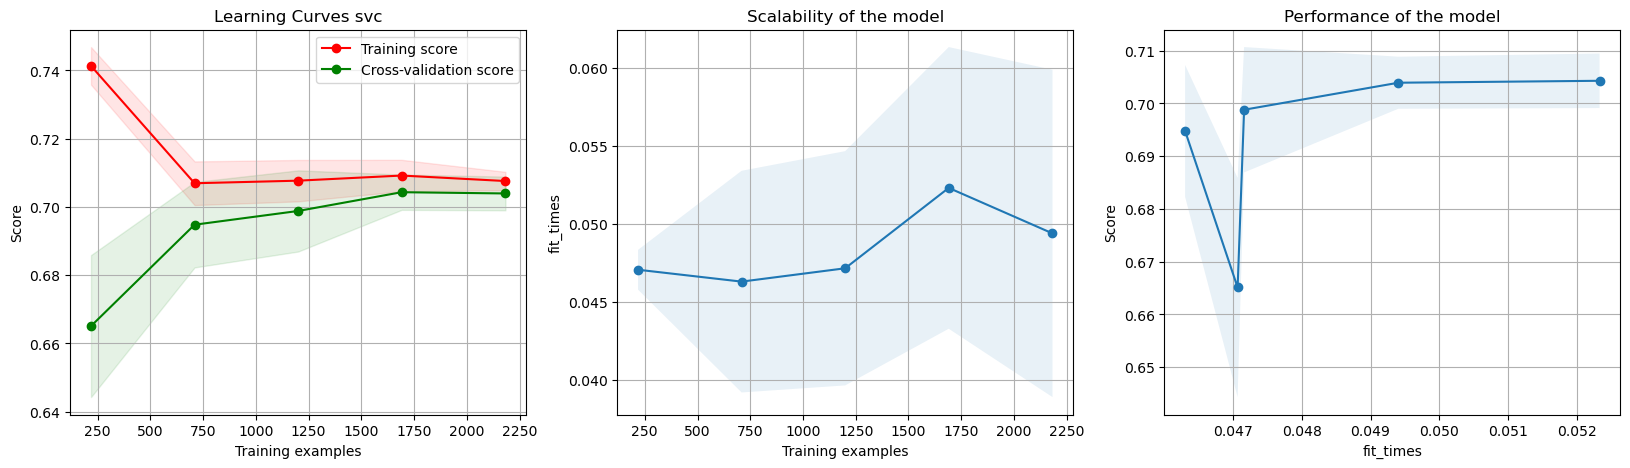

In [29]:
plot_learning_curve(loaded_best_estimator_round1, 'Learning Curves svc', X_train, y_train, n_jobs=-1)

From the learning curves, its is clear that both training and cross validation scores are low. **So there is clearly undetrfitting.** Even for very small training data, the training score is less than what we got from KNN. Since, we have not used any regularization, we cannot increase the capacity of model. **Hence, we will not do any further hyperparameter tuning using LinearSVC.** In case of underfitting, adding more training data will also not help. We can improve the perfromnace further by two methods (1) By adding more features or (2) by using non-linear models. 

In logistic regression, we added polynomial fearures. However, we can explore that more efficiently by using non-linear kernels (polynomial kernels) in case of SVM. We will now try non-linear kernels in round2.

### <font color = 'pickle'>**Check Cross Validation Score and Train Score**

In [30]:
#let's check the train scores
print(loaded_best_estimator_round1.score(X_train,y_train))

#let's check the cross validation score
print(loaded_complete_grid_round1.best_score_)

0.707218761451081
0.7039217663070874


## <font color = 'pickle'>**Hyperparameter Tuning - Round 2- Non-Linear SVM** 
- Initially we wil start with gaussin kernel. We will not do any regularization to see whether we can overfit the data.
- To acheive this we will use C = 1000 and not tune any other hyperparameter.

In [31]:
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname','Unnamed: 0']

churn_pipeline_svm_non_linear = Pipeline([
                           
                      
    ('drop_features',
      DropFeatures(columns_to_drop)),

    ('imputer_median',
      MeanMedianImputer(imputation_method='median', variables=['Age', 'Balance', 'NumOfProducts'])),

    ('imputer_catgorical_frequent',
      CategoricalImputer(imputation_method = 'frequent', variables=['Gender','Geography'])),

      ('imputer_missing_indicator',
      AddMissingIndicator(variables=['Age', 'Geography'])),

    ('imputer_random_sample',
      RandomSampleImputer(random_state=123, variables=['Tenure'])),
    
    ('log_transformer', LogTransformer(variables = ['Age'])
      ),
    
    ('discretizer_cs',
      SklearnTransformerWrapper(KBinsDiscretizer(n_bins=10, encode= 'ordinal', strategy = 'kmeans' ), 
                               variables = ['CreditScore'])),

    ('discretizer_bal',
      SklearnTransformerWrapper(KBinsDiscretizer(n_bins=10, encode= 'ordinal', strategy = 'kmeans' ), 
                               variables = ['Balance'])),
    
    ('one_hot_encoder',
      OneHotEncoder(variables=['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'CreditScore', 'Balance']
                   , drop_last= True, ignore_format=True)),

    ('outlier',
      Winsorizer(capping_method='gaussian', tail ='both', fold = 3, variables=['Age'])),

    ('scalar',
      SklearnTransformerWrapper(MinMaxScaler(), variables = ['Age', 'Tenure', 'EstimatedSalary', 'NumOfProducts'])),

    ('svc',
     SVC(random_state=123))
])

In [32]:
from sklearn import set_config

set_config(display='diagram')
churn_pipeline_svm_non_linear

Pipeline(steps=[('drop_features',
                 DropFeatures(features_to_drop=['RowNumber', 'CustomerId',
                                                'Surname', 'Unnamed: 0'])),
                ('imputer_median',
                 MeanMedianImputer(variables=['Age', 'Balance',
                                              'NumOfProducts'])),
                ('imputer_catgorical_frequent',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['Gender', 'Geography'])),
                ('imputer_missing_indicator',
                 AddMissingI...
                ('one_hot_encoder',
                 OneHotEncoder(drop_last=True, ignore_format=True,
                               variables=['Geography', 'Gender', 'HasCrCard',
                                          'IsActiveMember', 'CreditScore',
                                          'Balance'])),
                ('outlier', Winsorizer(tail='both', variables=['Age'])),
                ('scalar',
                 SklearnTransformerWrapper(transformer=MinMaxScaler(),
                                           variables=['Age', 'Tenure',
                                                      'EstimatedSalary',
                                                      'NumOfProducts'])),
                ('svc', SVC(random_state=123))])

### <font color = 'pickle'>**Specify Param Grid**

In [33]:
# now we create the grid with all the parameters that we would like to test.
param_grid_2 = {
    'discretizer_cs__transformer__n_bins': range(2, 12, 2),
    'discretizer_bal__transformer__n_bins': range(2, 8, 2),
    'svc__kernel' :['rbf', 'sigmoid'],
    'svc__C' :[1000],
     }

# now we set up the grid search with cross-validation
grid_svc_2 = GridSearchCV(churn_pipeline_svm_non_linear, param_grid_2,
                           cv=5, return_train_score= True, n_jobs=-1 )

### <font color = 'pickle'>**Fit Model**

In [34]:
# fit the model
grid_svc_2.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['RowNumber',
                                                                       'CustomerId',
                                                                       'Surname',
                                                                       'Unnamed: '
                                                                       '0'])),
                                       ('imputer_median',
                                        MeanMedianImputer(variables=['Age',
                                                                     'Balance',
                                                                     'NumOfProducts'])),
                                       ('imputer_catgorical_frequent',
                                        CategoricalImputer(imputation_method='frequent',
                                                           variables=['Gender',
                                                                      'Geography'])),
                                       ('imputer_...
                                       ('scalar',
                                        SklearnTransformerWrapper(transformer=MinMaxScaler(),
                                                                  variables=['Age',
                                                                             'Tenure',
                                                                             'EstimatedSalary',
                                                                             'NumOfProducts'])),
                                       ('svc', SVC(random_state=123))]),
             n_jobs=-1,
             param_grid={'discretizer_bal__transformer__n_bins': range(2, 8, 2),
                         'discretizer_cs__transformer__n_bins': range(2, 12, 2),
                         'svc__C': [1000], 'svc__kernel': ['rbf', 'sigmoid']},
             return_train_score=True)

### <font color = 'pickle'>**Get Best Params**

In [35]:
#Let's check the best_parameters from GridSearchCv for our model
print(grid_svc_2.best_params_)

{'discretizer_bal__transformer__n_bins': 6, 'discretizer_cs__transformer__n_bins': 2, 'svc__C': 1000, 'svc__kernel': 'rbf'}


### <font color = 'pickle'>**Save Model**

In [36]:
file_best_estimator_round2 = save_model_folder / 'svc_round2_best_estimator.pkl'
file_complete_grid_round2  = save_model_folder / 'svc_round2_complete_grid.pkl'

In [37]:
joblib.dump(grid_svc_2.best_estimator_, file_best_estimator_round2)
joblib.dump(grid_svc_2, file_complete_grid_round2)

['/home/harpreet/Insync/google_drive_shaannoor/data/models/ml_fall_2022/svc_round2_complete_grid.pkl']

### <font color = 'pickle'>**Load Saved Model**

In [38]:
loaded_best_estimator_round2 = joblib.load(file_best_estimator_round2)
loaded_complete_grid_round2 = joblib.load(file_complete_grid_round2)

### <font color = 'pickle'>**Plot Learning Curve**

**The Learning curve above clearly shows that there is overfiting. This means that the non-linear kernels has the capacity and we can fine tune non-linear kernels to get better cross-validation results.**

<module 'matplotlib.pyplot' from '/home/harpreet/mambaforge/lib/python3.10/site-packages/matplotlib/pyplot.py'>

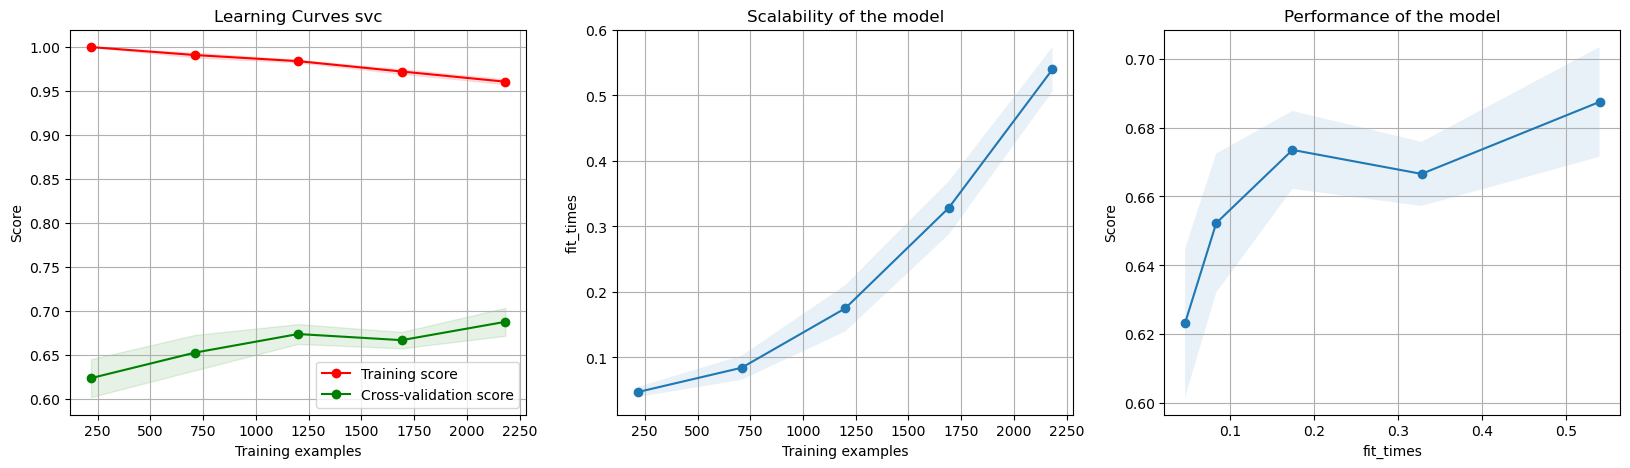

In [39]:
plot_learning_curve(loaded_best_estimator_round2 , 'Learning Curves svc', X_train, y_train, n_jobs=-1)

### <font color = 'pickle'>**Check Cross Validation Score and Train Score**

In [40]:
#let's check the train scores
print(loaded_best_estimator_round2.score(X_train,y_train))

#let's check the cross validation score
print(loaded_complete_grid_round2.best_score_)

0.9545621106632466
0.6870618677958127


## <font color = 'pickle'>**Hyperparameter Tuning - Round 3- Regularization for Overfitting**


Two importnat hyperparameters are:

- C: If your SVM model is overfitting, you can try regularizing it by reducing C.
- gamma: If your SVM model is overfitting, you can try regularizing it by reducing gamma.

- We need to optimize both C and gamma parameters simultaneously. C has neglegible effect when gamma is large. However for small values of gamma , C affects the model just like how it affects a linear model.

- Typical values for C and gamma are as follows :

        0.0001 < gamma < 10
        0.1 < C < 100


- In addition, the polynomial kernel has another parameter - degree
- If we evaluate all the kernels and corresponding hyperparameters, the combinations of parameters will become very large. Hence we will first use RandomizedSearchCV to explore the serach space more efficiently. We can further finetune the search space (if required) using GridSerachCV.

- Since both gamma and C are continuous variables, and can take wide range of values, we will use loguniform distribution for C and gamma.

- degree can take integer values, hence we wil use randomint distribution to specify the search space

In [41]:
# For continuous variables, we can specify serach space using linspace or logspace
# let us understand the difference
np.linspace(-3,3, 5)

array([-3. , -1.5,  0. ,  1.5,  3. ])

In [42]:
# Let us first take 5 evenly spaced values using 10 as the base.
for x in 10**(np.linspace(-3,3, 5)):
    print(f'{x:.4f}')

0.0010
0.0316
1.0000
31.6228
1000.0000


In [43]:
# 5 evenly distributed values in logspace
for x in np.logspace(-3,3, num=5):
    print(f'{x:.4f}')

0.0010
0.0316
1.0000
31.6228
1000.0000


In [44]:
# uniform distribution - pick a value randomly from numbers evenlty distributed in linear space
# mean of 1000000 random values
rand_num = np.random.uniform(0.01, 1000, size=1000000)
np.mean(rand_num)

500.216433722518

In [45]:
# mean of 1000000 linearly spaced values between 0.01 and 1000
lin_spaced_values =  np.linspace(0.01, 1000, num =1000000)
np.mean(lin_spaced_values)

500.00499999999994

In [46]:
# log uniform distribution - pick a value randomly from numbers evenlty distributed in log spacespace
# loguniform distribution
rand_num = loguniform.rvs(0.01, 1000, size=1000000)
np.mean(rand_num )

87.1539631556133

In [47]:
# # mean of 1000000 log spaced values between 0.01 and 1000 
log_spaced_values = np.logspace(-2, 3, num =1000000)
np.mean(log_spaced_values)

86.85844093961815

In [48]:
# Another way of understanding loguniform distribution
# we can first pick random value from uniform distribution
# and then calculate 10**random_value to get corresponding value from loguniform distribution

rand_num = (10**(np.random.uniform(-2, 3, size=1000000)))
np.mean(rand_num)

86.74700345376077

### <font color = 'pickle'>**Specify Param Grid- Use RandomSerachCV and two difefrent estimators in same grid**

In [49]:
param_grid_3 = [{
    'discretizer_cs__transformer__n_bins': range(2, 12, 2),
    'discretizer_bal__transformer__n_bins': range(2, 8, 2),
    'svc__kernel' :['rbf', 'sigmoid'],
    'svc__C' :loguniform(0.01, 1000),
    'svc__gamma' :loguniform(0.0001, 10),
     },
     {
    'discretizer_cs__transformer__n_bins': range(2, 12, 2),
    'discretizer_bal__transformer__n_bins': range(2, 8, 2),
    'svc__kernel' :['poly'],
    'svc__C' :loguniform(0.01, 1000),
    'svc__gamma' :loguniform(0.0001, 10),
    'svc__degree' :[2, 3, 4],
     }]

# now we set up the grid search with cross-validation
grid_svc_3 = RandomizedSearchCV(churn_pipeline_svm_non_linear, param_grid_3,
                           cv=5, return_train_score= True, n_jobs=-1, random_state=123, n_iter= 100)

### <font color = 'pickle'>**Fit Model**

In [50]:
grid_svc_3.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('drop_features',
                                              DropFeatures(features_to_drop=['RowNumber',
                                                                             'CustomerId',
                                                                             'Surname',
                                                                             'Unnamed: '
                                                                             '0'])),
                                             ('imputer_median',
                                              MeanMedianImputer(variables=['Age',
                                                                           'Balance',
                                                                           'NumOfProducts'])),
                                             ('imputer_catgorical_frequent',
                                              CategoricalImputer(imputation_method='frequent',
                                                                 variables=['Gender',
                                                                            'Geography'])),
                                             ('im...
                                        {'discretizer_bal__transformer__n_bins': range(2, 8, 2),
                                         'discretizer_cs__transformer__n_bins': range(2, 12, 2),
                                         'svc__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f8a81114b50>,
                                         'svc__degree': [2, 3, 4],
                                         'svc__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f8a811157b0>,
                                         'svc__kernel': ['poly']}],
                   random_state=123, return_train_score=True)

### <font color = 'pickle'>**Get Best Params**

In [51]:
#Let's check the best_parameters from GridSearchCv for our model
print(grid_svc_3.best_params_)

{'discretizer_bal__transformer__n_bins': 4, 'discretizer_cs__transformer__n_bins': 2, 'svc__C': 836.334924315455, 'svc__degree': 2, 'svc__gamma': 0.3341125105953782, 'svc__kernel': 'poly'}


### <font color = 'pickle'>**Save Model**

In [52]:
file_best_estimator_round3 = save_model_folder / 'svc_round3_best_estimator.pkl'
file_complete_grid_round3  = save_model_folder / 'svc_round3_complete_grid.pkl'

In [54]:
joblib.dump(grid_svc_3.best_estimator_, file_best_estimator_round3 )
joblib.dump(grid_svc_3, file_complete_grid_round3)

['/home/harpreet/Insync/google_drive_shaannoor/data/models/ml_fall_2022/svc_round3_complete_grid.pkl']

### <font color = 'pickle'>**Load Saved Model**

In [55]:
loaded_best_estimator_round3 = joblib.load(file_best_estimator_round3)
loaded_complete_grid_round3 = joblib.load(file_complete_grid_round3)

**It seems that model with poly kernel, degree =2, C= 836 and gamma = 0.33 gives us the best cross-validation results.**. Let us look at cross validation results more carefully to see if we can fine tune the model further.

<module 'matplotlib.pyplot' from '/home/harpreet/mambaforge/lib/python3.10/site-packages/matplotlib/pyplot.py'>

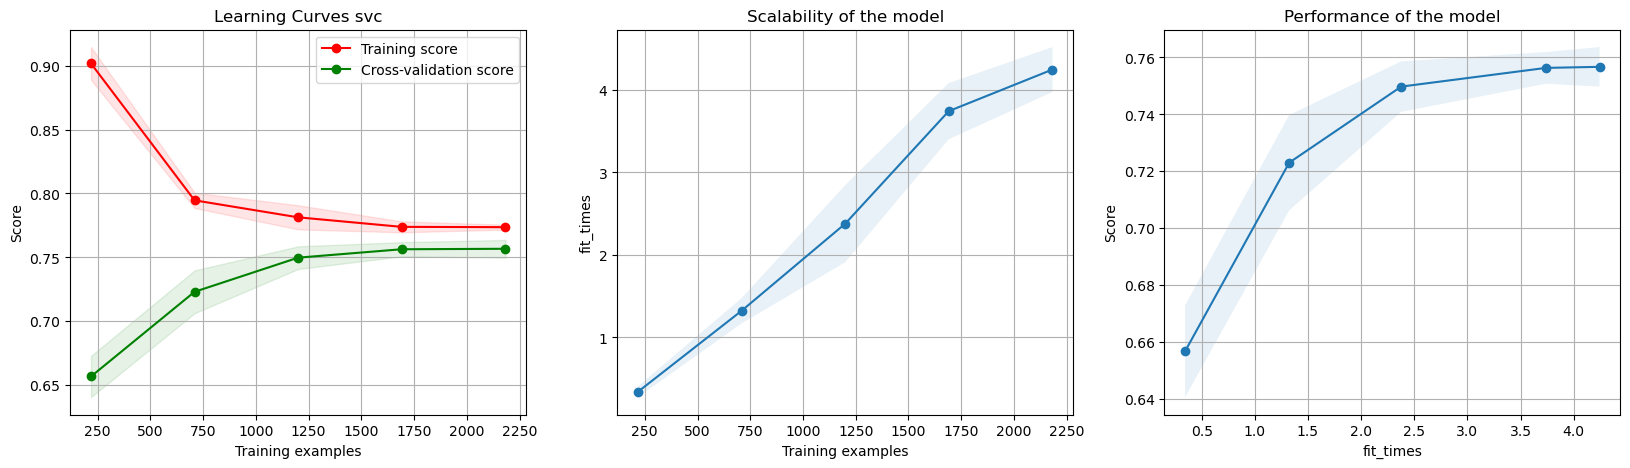

In [56]:
plot_learning_curve(loaded_best_estimator_round3, 'Learning Curves svc', X_train, y_train, n_jobs=-1)

### <font color = 'pickle'>**Check Cross Validation Score and Train Score**

In [57]:
#let's check the train scores
print(loaded_best_estimator_round3.score(X_train,y_train))

#let's check the cross validation score
print(loaded_complete_grid_round3.best_score_)

0.772810553316233
0.756688510266492


### <font color = 'pickle'>**Check RandomSerachCV Results**

In [58]:
# we also find the data for all models evaluated

results = pd.DataFrame(loaded_complete_grid_round3.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_discretizer_bal__transformer__n_bins,param_discretizer_cs__transformer__n_bins,param_svc__C,param_svc__gamma,param_svc__kernel,param_svc__degree,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.312276,0.003261,0.084965,0.002289,4,6,0.136225,0.057092,sigmoid,NaN,...,0.639797,0.027101,46,0.662391,0.652771,0.643152,0.654604,0.641941,0.650972,0.007610
1,0.283333,0.003867,0.072638,0.001774,4,4,26.555146,0.02539,sigmoid,NaN,...,0.700626,0.007449,13,0.706825,0.707284,0.707742,0.699954,0.702839,0.704929,0.003039
2,0.282769,0.002506,0.071144,0.001534,6,2,44.182322,0.015591,sigmoid,NaN,...,0.696960,0.010093,19,0.706367,0.697664,0.705451,0.709574,0.700549,0.703921,0.004262
3,0.223429,0.005313,0.075261,0.001712,2,2,48.975291,0.000817,rbf,NaN,...,0.693303,0.019924,22,0.694915,0.697206,0.702245,0.699038,0.691392,0.696959,0.003674
4,0.335063,0.004531,0.086361,0.000766,6,10,1.378217,0.003082,sigmoid,NaN,...,0.627337,0.016871,53,0.648649,0.633074,0.636738,0.644068,0.634615,0.639429,0.005955


In [59]:
# sort the results by mean_test_score
results.sort_values(by='mean_test_score', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

# lookk at top 10 combinations
results[[
    'param_svc__C', 'param_svc__kernel', 'param_svc__gamma','param_svc__degree', 
    'mean_test_score', 'std_test_score', 'mean_train_score'
]].head(10)


,param_svc__C,param_svc__kernel,param_svc__gamma,param_svc__degree,mean_test_score,std_test_score,mean_train_score
0,836.334924,poly,0.334113,2,0.756689,0.006949,0.773635
1,26.255216,poly,1.280916,2,0.744599,0.007601,0.780506
2,864.481073,poly,0.238601,2,0.742030,0.008838,0.778674
3,153.201841,poly,0.0447,2,0.726647,0.012680,0.779956
4,0.022319,poly,1.457407,3,0.721520,0.016827,0.805057
5,326.630584,rbf,0.005687,NaN,0.712352,0.006199,0.727006
6,0.018216,poly,2.523965,4,0.708325,0.014852,0.828875
7,0.243206,poly,0.403573,3,0.703928,0.011508,0.777300
8,52.954549,poly,0.323983,3,0.703922,0.008039,0.862770
9,799.349788,rbf,0.000404,NaN,0.702461,0.011049,0.710609


In [60]:
# lookk at bottom 10 combinations
results[[
    'param_svc__C', 'param_svc__kernel', 'param_svc__gamma','param_svc__degree', 
    'mean_test_score', 'std_test_score', 'mean_train_score'
]].tail(10)


,param_svc__C,param_svc__kernel,param_svc__gamma,param_svc__degree,mean_test_score,std_test_score,mean_train_score
90,0.019191,poly,0.074186,4,0.510459,0.020917,0.512912
91,114.753664,poly,0.005673,4,0.510459,0.020917,0.512912
92,89.930119,poly,0.006988,4,0.509358,0.018716,0.510989
93,3.43575,poly,0.000583,4,0.509358,0.018716,0.511905
94,0.049213,poly,0.013229,4,0.509358,0.018716,0.511905
95,0.558566,poly,0.000106,4,0.509358,0.018716,0.510989
96,0.101624,sigmoid,1.143462,NaN,0.502024,0.021119,0.503847
97,0.335404,sigmoid,3.065665,NaN,0.492123,0.018656,0.499634
98,26.080419,sigmoid,3.832599,NaN,0.472705,0.012204,0.477739
99,67.200982,sigmoid,8.168761,NaN,0.465378,0.021056,0.473524


From the above results, we can see that RandomizedSearchCV has taken random combinations of parameters. For top 10 results, 9 used poly kernel. For top 4 results, degree is 2. We can also see that either C is very large or gamma is large. This shows that a poly kernel with degree 2 will give us the best results. Higher values of C means that, model with no regularization will give us the best results. Thus we do not need to further fine tune the model. This was also evident from the learning curve.

# <font color = 'pickle'>**Perfromnace on Test Data**

## <font color = 'pickle'> **Test Accuracy** using best model

### <font color = 'pickle'>**Load saved Model**

In [64]:
file_best_estimator_svc = save_model_folder / 'svc_round3_best_estimator.pkl'
best_estimator_svc = joblib.load(file_best_estimator_svc )

### <font color = 'pickle'>**Test Accuracy**

In [65]:
#let's check the test scores for final model
print(f'Test data accauracy for round 4: {best_estimator_svc.score(X_test,y_test)}')

Test data accauracy for round 4: 0.758364312267658


### <font color = 'pickle'> **Confusion Matrix- Round3**

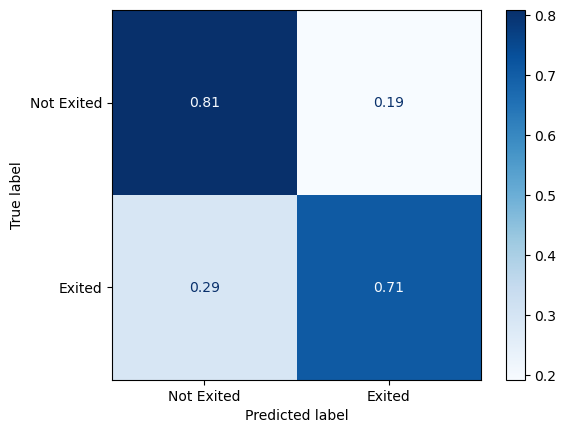

In [66]:
ConfusionMatrixDisplay.from_estimator(best_estimator_svc, X_test, y_test,
                                 display_labels=['Not Exited', 'Exited'],
                                 cmap=plt.cm.Blues,
                                 normalize = 'true')
plt.grid(False)
plt.show()

# <font color = 'pickle'>**Final Conclusion**

The round 3 pipeline seems to have the best performance. The best model till now was logistic regression. The SVM has similar performance. However, the fit times are considerably smaller for logistic regression. Also from learning curves, it seems that logistic regression scales better. **Hence we comclude that we should use Logistic regression.**